In [1]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# Hyperparameters
latent_dim = 100
img_size = 28 * 28
batch_size = 128
learning_rate = 0.0002
num_epochs = 100
device = torch.device("mps") if torch.backends.mps.is_available() else torch.device("cpu")
print("Using device: ", device)

Using device:  mps


In [3]:
# Data Loading
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize([0.5], [0.5])])
dataset = torchvision.datasets.MNIST(root="./data", train=True, transform=transform, download=True)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


In [4]:
# Generator Model
class Generator(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, output_dim),
            nn.Tanh()
        )

    def forward(self, x):
        return self.model(x)


In [5]:
# Discriminator Model
class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)


In [6]:
# Initialize models
generator = Generator(latent_dim, img_size).to(device)
discriminator = Discriminator(img_size).to(device)

# Loss and Optimizers
criterion = nn.BCELoss()
g_optimizer = optim.Adam(generator.parameters(), lr=learning_rate)
d_optimizer = optim.Adam(discriminator.parameters(), lr=learning_rate)


In [7]:
# Utility function to denormalize images
def denormalize(img):
    img = img * 0.5 + 0.5
    return img


Epoch [1/100]  D Loss: 0.0017  G Loss: 7.7875


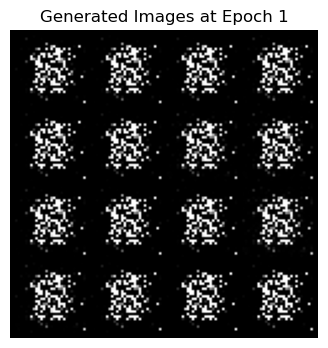

Epoch [2/100]  D Loss: 0.0205  G Loss: 10.4900
Epoch [3/100]  D Loss: 0.6104  G Loss: 3.4675
Epoch [4/100]  D Loss: 0.3640  G Loss: 4.4277
Epoch [5/100]  D Loss: 0.2092  G Loss: 2.6728
Epoch [6/100]  D Loss: 0.0558  G Loss: 4.7064
Epoch [7/100]  D Loss: 0.1900  G Loss: 3.7759
Epoch [8/100]  D Loss: 0.0520  G Loss: 8.9060
Epoch [9/100]  D Loss: 0.0754  G Loss: 8.2295
Epoch [10/100]  D Loss: 0.1784  G Loss: 5.3138
Epoch [11/100]  D Loss: 0.5081  G Loss: 8.5080


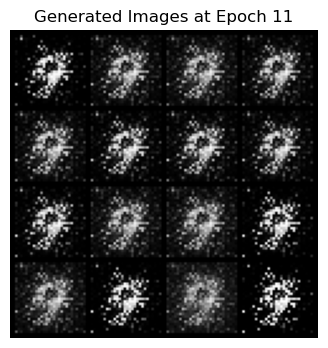

Epoch [12/100]  D Loss: 0.0536  G Loss: 8.8189
Epoch [13/100]  D Loss: 0.0862  G Loss: 6.0565
Epoch [14/100]  D Loss: 0.1128  G Loss: 8.4348
Epoch [15/100]  D Loss: 0.1497  G Loss: 7.4826
Epoch [16/100]  D Loss: 0.1762  G Loss: 5.2659
Epoch [17/100]  D Loss: 0.1139  G Loss: 7.6819
Epoch [18/100]  D Loss: 0.0656  G Loss: 5.1872
Epoch [19/100]  D Loss: 0.3368  G Loss: 4.4431
Epoch [20/100]  D Loss: 0.2966  G Loss: 4.6167
Epoch [21/100]  D Loss: 0.1419  G Loss: 6.1948


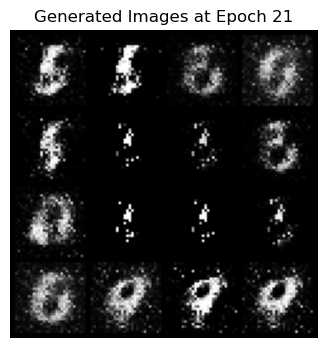

Epoch [22/100]  D Loss: 0.1585  G Loss: 4.8573
Epoch [23/100]  D Loss: 0.2147  G Loss: 4.0191
Epoch [24/100]  D Loss: 0.4287  G Loss: 4.3466
Epoch [25/100]  D Loss: 0.1261  G Loss: 8.4341
Epoch [26/100]  D Loss: 0.6752  G Loss: 7.2430
Epoch [27/100]  D Loss: 0.2723  G Loss: 4.3929
Epoch [28/100]  D Loss: 0.1886  G Loss: 6.4666
Epoch [29/100]  D Loss: 0.1115  G Loss: 5.4896
Epoch [30/100]  D Loss: 0.3892  G Loss: 4.8623
Epoch [31/100]  D Loss: 0.1849  G Loss: 5.4393


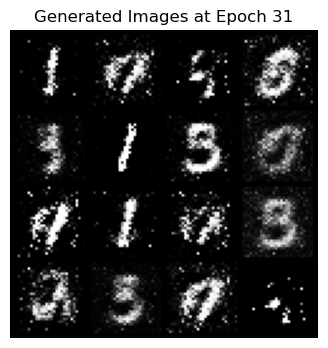

Epoch [32/100]  D Loss: 0.1258  G Loss: 4.6971
Epoch [33/100]  D Loss: 0.2085  G Loss: 3.7682
Epoch [34/100]  D Loss: 0.1465  G Loss: 5.5892
Epoch [35/100]  D Loss: 0.4282  G Loss: 3.4826
Epoch [36/100]  D Loss: 0.3140  G Loss: 3.3510
Epoch [37/100]  D Loss: 0.1572  G Loss: 4.1505
Epoch [38/100]  D Loss: 0.2552  G Loss: 3.0349
Epoch [39/100]  D Loss: 0.3208  G Loss: 2.8949
Epoch [40/100]  D Loss: 0.3552  G Loss: 2.9691
Epoch [41/100]  D Loss: 0.4300  G Loss: 4.0901


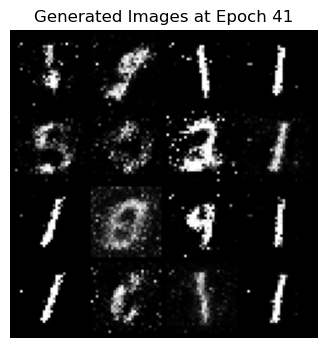

Epoch [42/100]  D Loss: 0.3981  G Loss: 3.2549
Epoch [43/100]  D Loss: 0.3564  G Loss: 2.3156
Epoch [44/100]  D Loss: 0.4753  G Loss: 2.6657
Epoch [45/100]  D Loss: 0.2340  G Loss: 3.1791
Epoch [46/100]  D Loss: 0.3912  G Loss: 3.5120
Epoch [47/100]  D Loss: 0.4995  G Loss: 3.3069
Epoch [48/100]  D Loss: 0.3303  G Loss: 3.7288
Epoch [49/100]  D Loss: 0.4294  G Loss: 2.4750
Epoch [50/100]  D Loss: 0.5699  G Loss: 3.0184
Epoch [51/100]  D Loss: 0.5446  G Loss: 2.1212


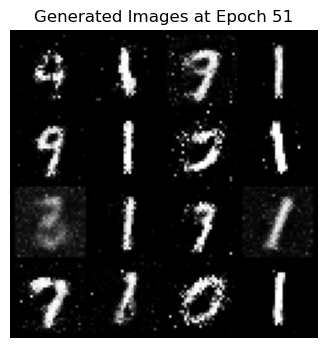

Epoch [52/100]  D Loss: 0.5416  G Loss: 2.3466
Epoch [53/100]  D Loss: 0.5080  G Loss: 3.1813
Epoch [54/100]  D Loss: 0.6358  G Loss: 2.9444
Epoch [55/100]  D Loss: 0.4798  G Loss: 2.0880
Epoch [56/100]  D Loss: 0.5447  G Loss: 2.1011
Epoch [57/100]  D Loss: 0.6403  G Loss: 2.0378
Epoch [58/100]  D Loss: 0.7871  G Loss: 2.1306
Epoch [59/100]  D Loss: 0.7485  G Loss: 2.3837
Epoch [60/100]  D Loss: 0.6619  G Loss: 2.7203
Epoch [61/100]  D Loss: 0.6248  G Loss: 1.4645


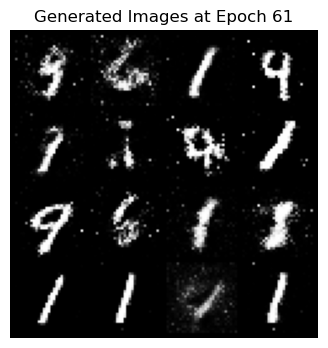

Epoch [62/100]  D Loss: 0.7166  G Loss: 2.2257
Epoch [63/100]  D Loss: 0.6734  G Loss: 2.3611
Epoch [64/100]  D Loss: 0.5779  G Loss: 2.8364
Epoch [65/100]  D Loss: 0.6074  G Loss: 2.5036
Epoch [66/100]  D Loss: 0.5963  G Loss: 1.8522
Epoch [67/100]  D Loss: 0.5978  G Loss: 2.5172
Epoch [68/100]  D Loss: 0.7952  G Loss: 1.8435
Epoch [69/100]  D Loss: 0.7017  G Loss: 1.3344
Epoch [70/100]  D Loss: 0.7929  G Loss: 2.8524
Epoch [71/100]  D Loss: 0.6575  G Loss: 1.9153


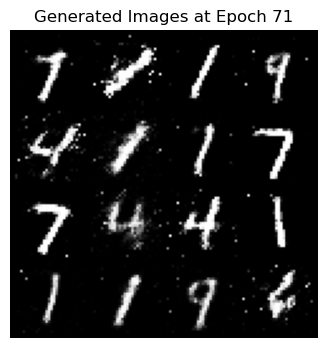

Epoch [72/100]  D Loss: 0.8535  G Loss: 1.3518
Epoch [73/100]  D Loss: 0.6395  G Loss: 2.0032
Epoch [74/100]  D Loss: 0.5962  G Loss: 1.9313
Epoch [75/100]  D Loss: 1.1020  G Loss: 1.5377
Epoch [76/100]  D Loss: 0.8751  G Loss: 1.7160
Epoch [77/100]  D Loss: 0.7848  G Loss: 1.6640
Epoch [78/100]  D Loss: 0.8419  G Loss: 1.9143
Epoch [79/100]  D Loss: 0.7471  G Loss: 1.6536
Epoch [80/100]  D Loss: 0.5903  G Loss: 2.6836
Epoch [81/100]  D Loss: 0.6550  G Loss: 1.7593


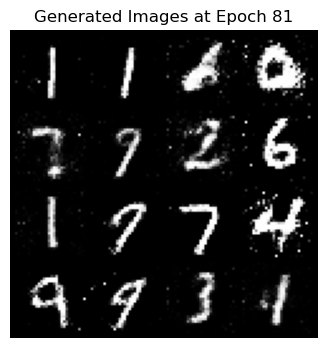

Epoch [82/100]  D Loss: 0.7135  G Loss: 1.8193
Epoch [83/100]  D Loss: 0.6709  G Loss: 2.2346
Epoch [84/100]  D Loss: 0.8408  G Loss: 1.6149
Epoch [85/100]  D Loss: 0.6410  G Loss: 1.9912
Epoch [86/100]  D Loss: 0.7470  G Loss: 2.0252
Epoch [87/100]  D Loss: 0.8193  G Loss: 2.0090
Epoch [88/100]  D Loss: 0.9297  G Loss: 2.2185
Epoch [89/100]  D Loss: 0.6181  G Loss: 2.5302
Epoch [90/100]  D Loss: 0.7769  G Loss: 1.4708
Epoch [91/100]  D Loss: 0.5962  G Loss: 1.5670


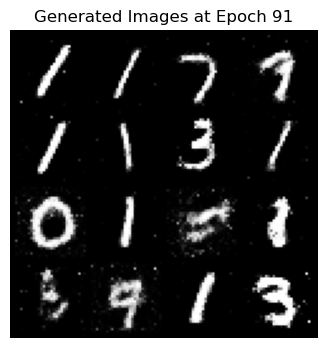

Epoch [92/100]  D Loss: 0.6141  G Loss: 1.8859
Epoch [93/100]  D Loss: 0.7889  G Loss: 1.8716
Epoch [94/100]  D Loss: 0.8915  G Loss: 1.6346
Epoch [95/100]  D Loss: 1.0082  G Loss: 1.7449
Epoch [96/100]  D Loss: 0.8588  G Loss: 1.4893
Epoch [97/100]  D Loss: 1.0116  G Loss: 1.7026
Epoch [98/100]  D Loss: 0.7425  G Loss: 1.6068
Epoch [99/100]  D Loss: 0.8300  G Loss: 2.1035
Epoch [100/100]  D Loss: 0.8043  G Loss: 1.5763


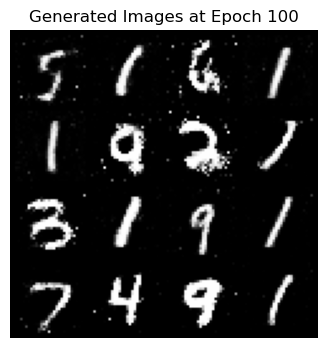

In [8]:
# Training Loop
g_losses = []
d_losses = []

for epoch in range(num_epochs):
    for i, (imgs, _) in enumerate(dataloader):
        # Flatten the images and move to device
        real_imgs = imgs.view(-1, img_size).to(device)
        batch_size = real_imgs.size(0)

        # Labels for real and fake images
        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)

        # Train Discriminator
        z = torch.randn(batch_size, latent_dim).to(device)
        fake_imgs = generator(z)

        real_loss = criterion(discriminator(real_imgs), real_labels)
        fake_loss = criterion(discriminator(fake_imgs.detach()), fake_labels)
        d_loss = real_loss + fake_loss

        d_optimizer.zero_grad()
        d_loss.backward()
        d_optimizer.step()

        # Train Generator
        z = torch.randn(batch_size, latent_dim).to(device)
        fake_imgs = generator(z)
        g_loss = criterion(discriminator(fake_imgs), real_labels)

        g_optimizer.zero_grad()
        g_loss.backward()
        g_optimizer.step()

        # Save losses for plotting
        g_losses.append(g_loss.item())
        d_losses.append(d_loss.item())

    # Print progress
    print(f"Epoch [{epoch+1}/{num_epochs}]  D Loss: {d_loss.item():.4f}  G Loss: {g_loss.item():.4f}")

    # Visualize the generated images at certain epochs
    if epoch % 10 == 0 or epoch == num_epochs - 1:
        with torch.no_grad():
            z = torch.randn(16, latent_dim).to(device)
            sample_imgs = generator(z).view(-1, 1, 28, 28)
            grid = torchvision.utils.make_grid(sample_imgs, nrow=4, normalize=True)
            plt.figure(figsize=(4, 4))
            plt.imshow(np.transpose(grid.cpu().numpy(), (1, 2, 0)))
            plt.title(f"Generated Images at Epoch {epoch+1}")
            plt.axis("off")
            plt.show()


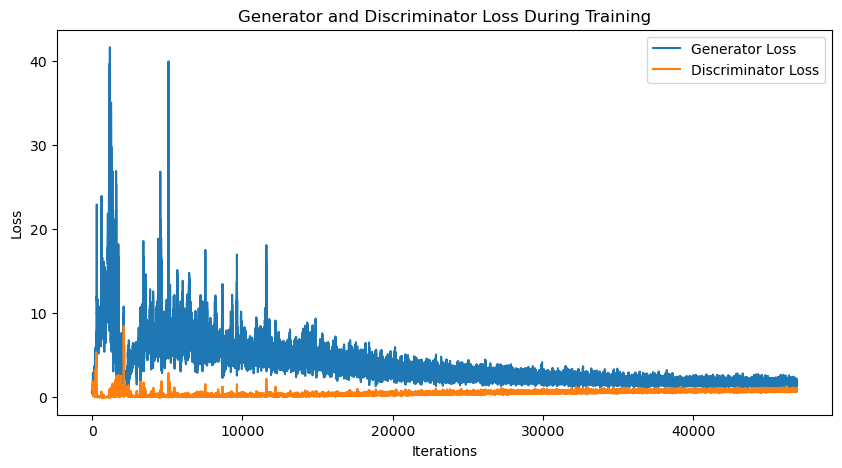

In [9]:
# Plot the loss curves
plt.figure(figsize=(10, 5))
plt.plot(g_losses, label="Generator Loss")
plt.plot(d_losses, label="Discriminator Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.title("Generator and Discriminator Loss During Training")
plt.show()
